In [1]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os.path
from scipy import interpolate
PI=math.pi

In [2]:
### Некоторые неменяющиеся величины для сцинтиллятора в основании
photon=np.arange(189).reshape(21,9)
errph=np.arange(189).reshape(21,9)
angle=np.array([10.,20.,30.,40.,45.,50.,60.,70.,80.])
distance=np.array([float(i) for i in range (50,8,-2)])
r_min=np.array([float(i-1) for i in range (10,52,2)])
r_max=np.array([float(math.fabs(i-1)) for i in range(10,52,2)])
for i in range (20): r_max[i]=r_max[i+1]
r_max[20]=50

### Функция коэффициента детерминации
def determination(x,y,z):
    sigmsq=1/len(y)*sum((y[:]-z[0]*(x[:])**2 - z[1]*(x[:]) - z[2])**2)
    middle=1/len(y)*sum(y)
    sigmsqy=1/len(y)*sum((y-middle)**2)
    hisqr=(1-sigmsq/sigmsqy)
    hisqrcorrected=(1-(1-hisqr)*(len(y)-1)/(len(y)-3))
    if (hisqr<0) : print('Качество приближения - выколите мне глаза 1 - %f' %(hisqr))
    elif (hisqrcorrected<0): print('Качество приближения - выколите мне глаза 2 - %f' %(hisqrcorrected))
    elif ((hisqrcorrected < hisqr) & (hisqrcorrected>0.8)): print('Качество приближения очень хорошее - %f' %(hisqrcorrected))   
    elif ((hisqrcorrected < hisqr) & (hisqrcorrected<0.8)): print('Качество приближения приемлимое - %f' %(hisqrcorrected))   
    else: print('Что не так-то')
print(len(r_min))
print(len(r_max))
print(len(distance))

21
21
21


## deegres9 -  в этой папке конусы от 10 до 80 градусов
## Отражение диффузное
## Отражение основания - 0.85, отражение стенок - 0.99
## Запускалось по 100000

D:\figures\конус\deegres9\10.txt
D:\figures\конус\deegres9\20.txt
D:\figures\конус\deegres9\30.txt
D:\figures\конус\deegres9\40.txt
D:\figures\конус\deegres9\45.txt
D:\figures\конус\deegres9\50.txt
D:\figures\конус\deegres9\60.txt
D:\figures\конус\deegres9\70.txt
D:\figures\конус\deegres9\80.txt
-------------------------------------------------------------------
Качество приближения очень хорошее - 0.994299
Функция аппроксимирующей кривой y=0.010953x^2+-1.184638x+34.403028
Иттегральный коэффициент светосбора 11.999534 +/- 0.103422
Среднее число собранных фотонов 1199.953400 +/- 10.342160 
Значение критерия 1 - 0.922253  +/- 0.001826 
Значение критерия 2 - 0.061500  +/- 0.018275 
-------------------------------------------------------------------
-------------------------------------------------------------------
Качество приближения очень хорошее - 0.960012
Функция аппроксимирующей кривой y=0.004885x^2+-0.588582x+23.508642
Иттегральный коэффициент светосбора 11.684578 +/- 0.104734
Сред

<ErrorbarContainer object of 3 artists>

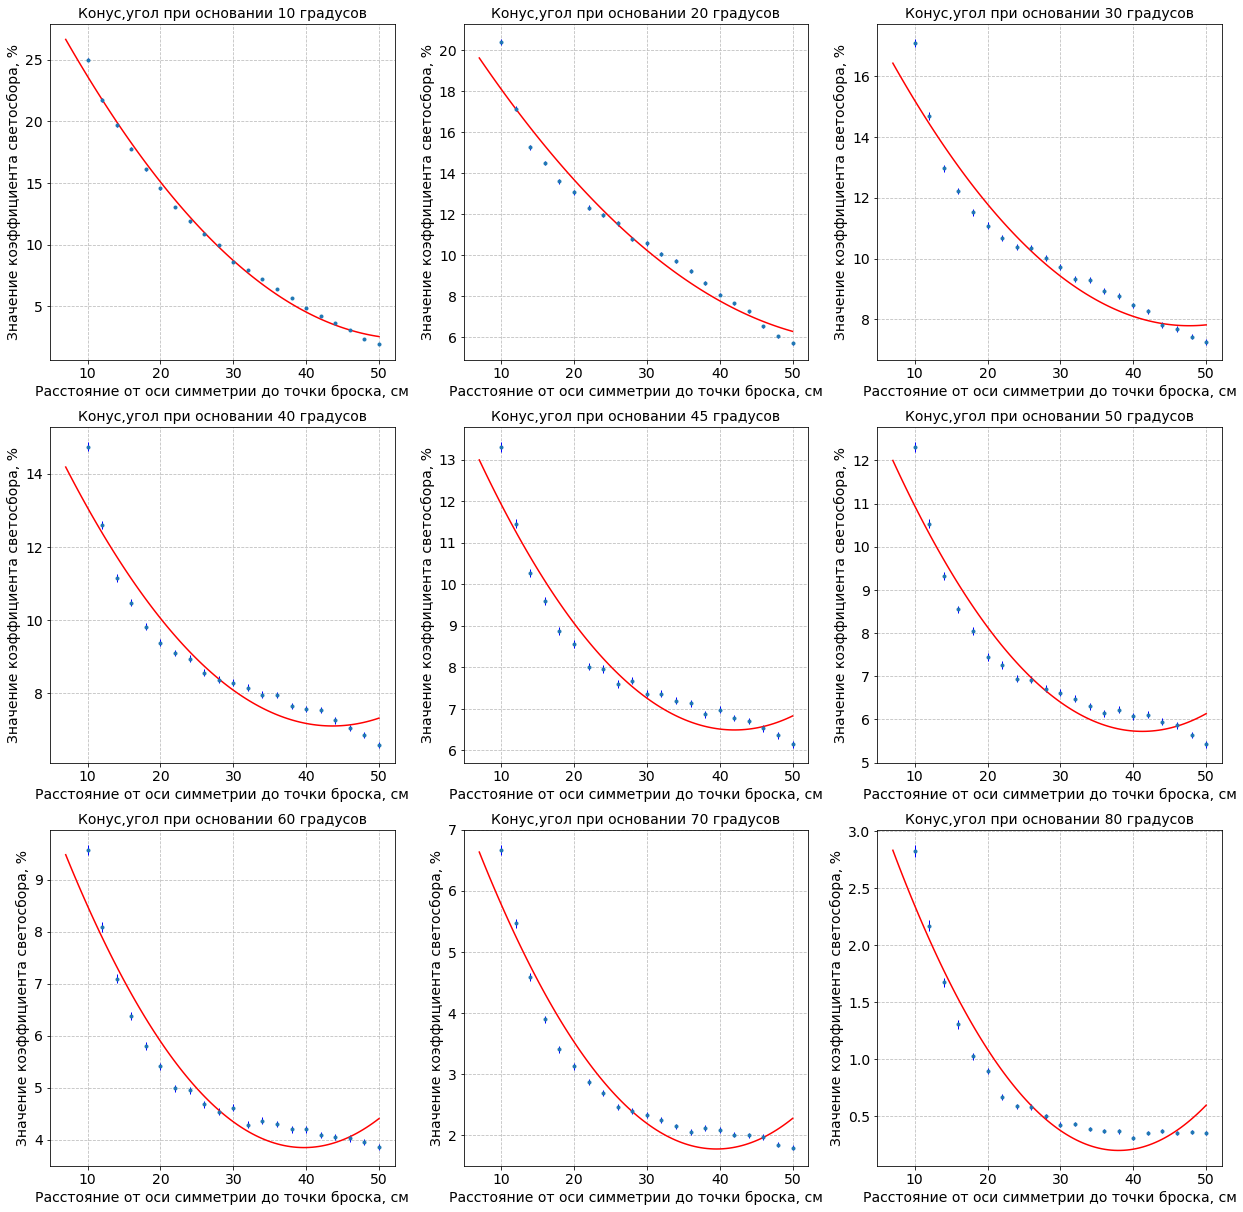

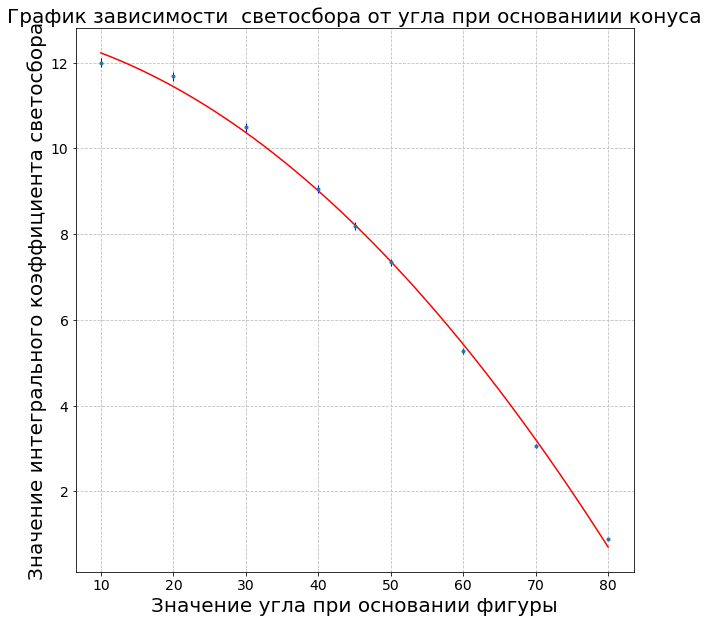

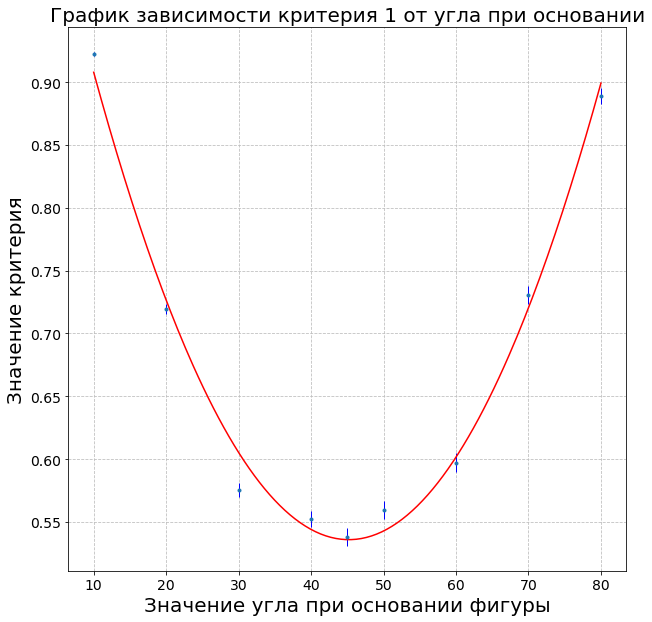

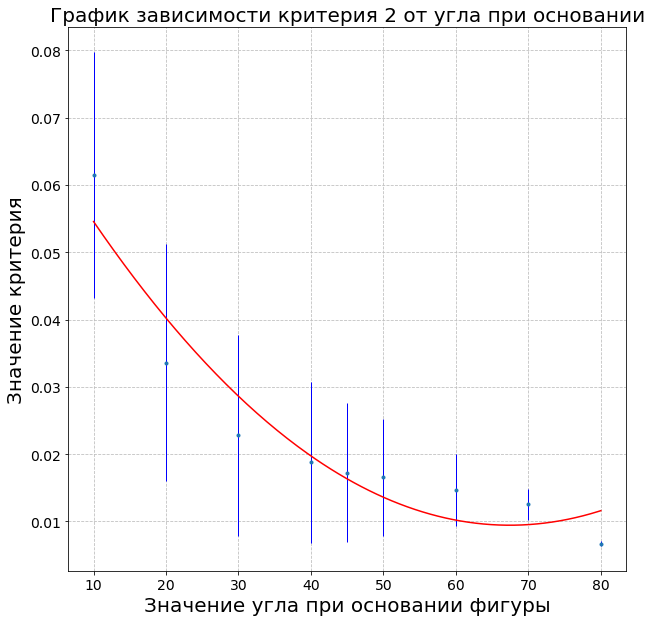

In [4]:
### Чтение данных. Запущено в каждой точке по 100000 фотонов
for i in range(9):           
    file_name=r"D:\figures\конус\deegres9\%d.txt"%(angle[i])
    file=open(file_name, 'r')
    print(file_name)
    for j in range (0,21,1):    
        line=file.readline()
        t=int(line)
        photon[j][i]=t
        
### Массив из значений ошибок для каждой точки бросания        
errph[:,:]=photon[:,:]**(1/2)

### Рассчет интегрального коэффициента светосбора с погрешностью для каждой фигуры
### Рассчет среднего числа собранных фотонов с погрешностью для каждой фигуры
light=np.array([ float(sum((r_max[:]**2-r_min[:]**2)*PI*photon[:,i]/1000)/(PI*r_max[20]**2) ) for i in range (9)])
lighterr=np.array([ float(sum((r_max[:]**2-r_min[:]**2)*PI*errph[:,i]/1000)/(PI*r_max[20]**2) ) for i in range (9)])
midpho=np.array([ float(light[i]*100) for i in range (9)])
midphoerr=np.array([ float(lighterr[i]*100) for i in range (9)])

### Рассчет знчения критерия 1 (ищется относительное значение разброса между максимально собранным числом фотонов
### и минимальным значением) c погрешностью
kr1=np.array([ float((photon[:,i].max()-photon[:,i].min())/photon[:,i].max()) for i in range (9)])
kr1err=np.array([float((1-kr1[i])*((errph[:,i].max()/photon[:,i].max())**2+(errph[:,i].min()/photon[:,i].min())**2)**(1/2)) for i in range (9)])

### Рассчет критерия 2 (оценка дисперсии для каждонго угла)  с погрешностью
kr2=np.array([ float((sum((light[i]/100-photon[:,i]/100000)**2*PI*(r_max[:]**2-r_min[:]**2))/(PI*r_max[20]**2))**(1/2)) for i in range (9)])
kr2err=np.array([float((sum(2*((light[i]/100-photon[:,i]/100000)**2*(lighterr[i]/100)**2 + (light[i]-photon[:,i]/100000)**2*(errph[:,i]/100000)**2)*PI*(r_max[:]**2-r_min[:]**2))/(PI*r_max[20]**2))**(1/2)) for i in range (9)])   
        
### Построение графиков зависимости зарегистрированных фотонов от расстояния до оси симметрии
plt.figure(figsize=(21, 21))
for i in range (9):
    #plt.figure(i, figsize=(10, 10))
    plt.subplot(3,3,i+1)
    plt.grid(True, linestyle='--', color='0.75')
    plt.xlabel('Расстояние от оси симметрии до точки броска, см', size = '14')
    plt.ylabel('Значение коэффициента светосбора, %', size = '14')
    plt.title('Конус,угол при основании %d градусов' %(angle[i]), size = '14')
    hk=photon[:,i]/1000
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    print('-------------------------------------------------------------------')
        
    ### Рассчет коэффициента детерминации - оценки качества приближения
    z=np.polyfit(distance,hk,2)
    determination(distance,hk,z)
    
    ### Вывод остального нужного   
    print('Функция аппроксимирующей кривой y=%fx^2+%fx+%f' %(z[0], z[1], z[2]))
    print('Иттегральный коэффициент светосбора %f +/- %f' %(light[i], lighterr[i]))
    print('Среднее число собранных фотонов %f +/- %f ' %(midpho[i], midphoerr[i]))
    print('Значение критерия 1 - %f  +/- %f ' %(kr1[i], kr1err[i]))
    print('Значение критерия 2 - %f  +/- %f ' %(kr2[i], kr2err[i]))
    print('-------------------------------------------------------------------')
    dis1=np.linspace(7,50,num=100)
    plt.plot(dis1, z[0]*(dis1)**2+ z[1]*(dis1)+z[2], 'r', label='Fitted line')
    plt.errorbar(distance, hk, yerr=errph[:,i]/1000,fmt='.', ecolor='b', linewidth=1, label='Dots with errors')
    
### Построение графика для интегрального коэффициента светосбора    
plt.figure(10, figsize=(10, 10))        
plt.subplot(1,1,1)
plt.grid(True, linestyle='--', color='0.75')
plt.title('График зависимости  светосбора от угла при основаниии конуса', size = '20')
plt.xlabel('Значение угла при основании фигуры', size = '20')
plt.ylabel('Значение интегрального коэффициента светосбора', size = '20')
z=np.polyfit(angle,light,2)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

###  Рассчет коэффициента детерминации - оценки качества приближения
print('-------------------------------------------------------------------')
print('Интегральный светосбор')
determination(angle,light,z)
print('-------------------------------------------------------------------')  

###    
dis2=np.linspace(10,80,num=200)
plt.plot(dis2, z[0]*(dis2)**2+ z[1]*(dis2)+z[2], 'r')
plt.errorbar(angle, light, yerr=lighterr,fmt='.', ecolor='b', linewidth=1)

### Построение графика для Критерия 1
plt.figure(11, figsize=(10, 10))        
plt.subplot(1,1,1)
plt.grid(True, linestyle='--', color='0.75')
plt.title('График зависимости критерия 1 от угла при основании', size = '20')
plt.xlabel('Значение угла при основании фигуры', size = '20')
plt.ylabel('Значение критерия', size = '20')
z1=np.polyfit(angle,kr1,2)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

###  Рассчет коэффициента детерминации - оценки качества приближения
print('-------------------------------------------------------------------')
print('Критерий первый')
determination(angle,kr1,z1)
print('-------------------------------------------------------------------')

###  
plt.plot(dis2, z1[0]*(dis2)**2+ z1[1]*(dis2)+z1[2], 'r')
plt.errorbar(angle, kr1, yerr=kr1err,fmt='.', ecolor='b', linewidth=1)

### Построение графика для Критерия 2
plt.figure(12, figsize=(10, 10))        
plt.subplot(1,1,1)
plt.grid(True, linestyle='--', color='0.75')
plt.title('График зависимости критерия 2 от угла при основании', size = '20')
plt.xlabel('Значение угла при основании фигуры', size = '20')
plt.ylabel('Значение критерия', size = '20')
z1=np.polyfit(angle,kr2,2)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

###  Рассчет коэффициента детерминации - оценки качества приближения
print('-------------------------------------------------------------------')
print('Критерий второй')
determination(angle,kr2,z1)
print('-------------------------------------------------------------------')

###  
plt.plot(dis2, z1[0]*(dis2)**2+ z1[1]*(dis2)+z1[2], 'r')
plt.errorbar(angle, kr2, yerr=kr2err,fmt='.', ecolor='b', linewidth=1)

## deegres10 -  в этой папке конусы от 10 до 80 градусов
## Отражение зеркальное
## Отражение основания - 0.85, отражение стенок - 0.99
## Запускалось по 100000

D:\figures\конус\deegres10\10.txt
D:\figures\конус\deegres10\20.txt
D:\figures\конус\deegres10\30.txt
D:\figures\конус\deegres10\40.txt
D:\figures\конус\deegres10\45.txt
D:\figures\конус\deegres10\50.txt
D:\figures\конус\deegres10\60.txt
D:\figures\конус\deegres10\70.txt
D:\figures\конус\deegres10\80.txt
-------------------------------------------------------------------
Качество приближения очень хорошее - 0.972695
Функция аппроксимирующей кривой y=0.015994x^2+-1.383201x+31.458103
Иттегральный коэффициент светосбора 7.958386 +/- 0.082200
Среднее число собранных фотонов 795.838560 +/- 8.220000 
Значение критерия 1 - 0.952392  +/- 0.001496 
Значение критерия 2 - 0.054193  +/- 0.009844 
-------------------------------------------------------------------
-------------------------------------------------------------------
Качество приближения очень хорошее - 0.909564
Функция аппроксимирующей кривой y=0.016279x^2+-1.326668x+30.243784
Иттегральный коэффициент светосбора 8.330267 +/- 0.086205

<ErrorbarContainer object of 3 artists>

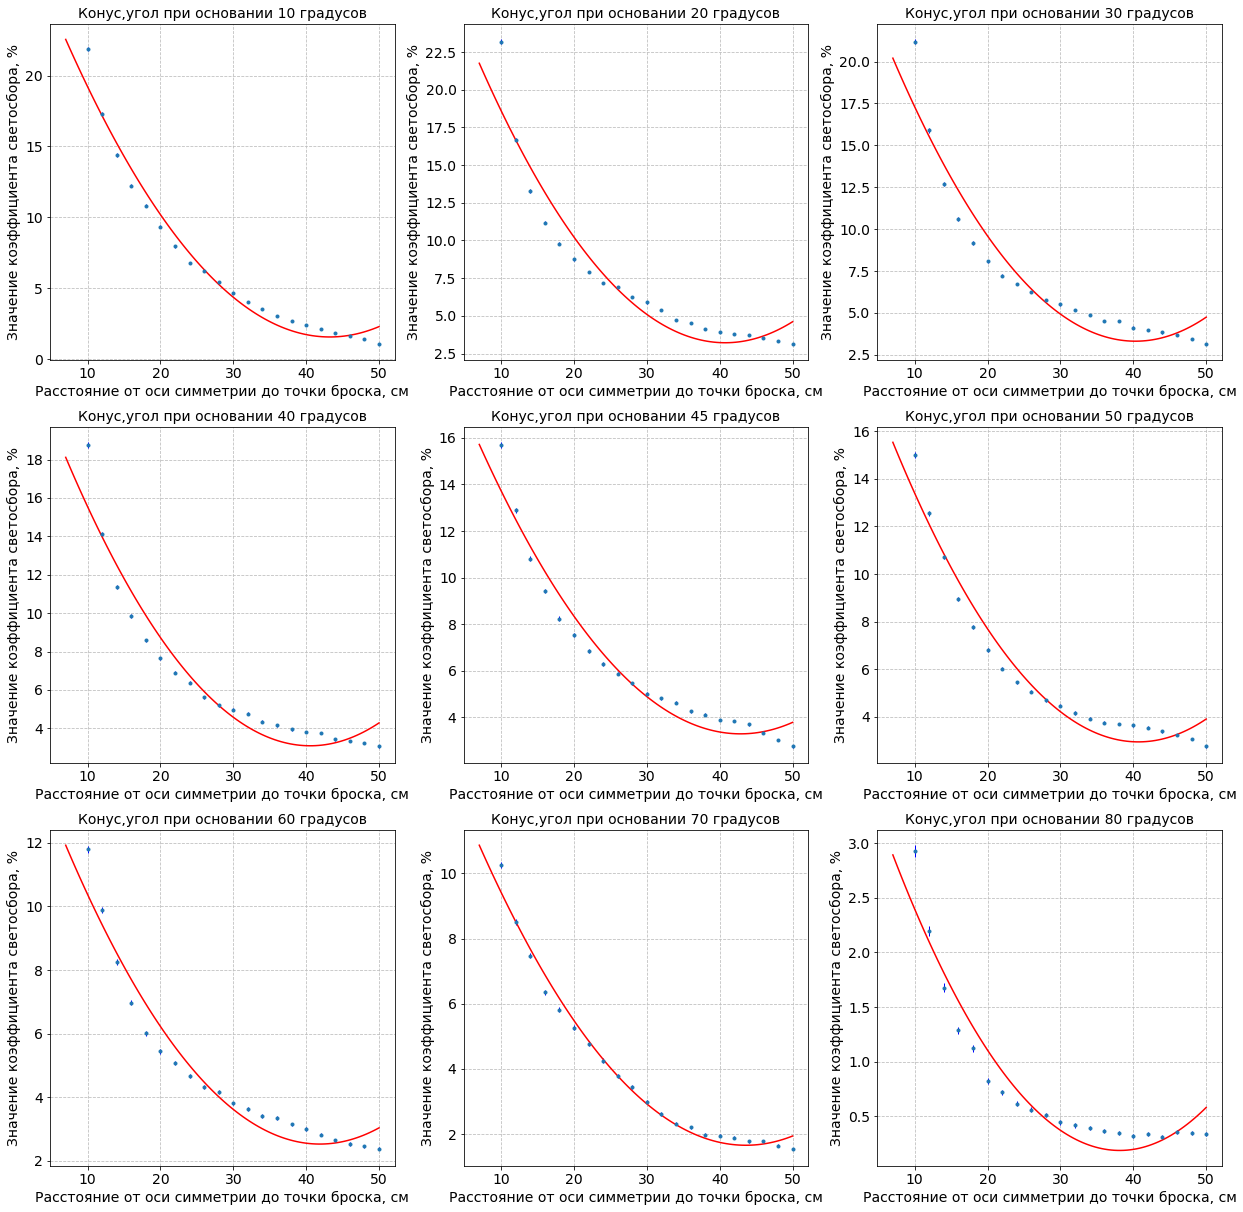

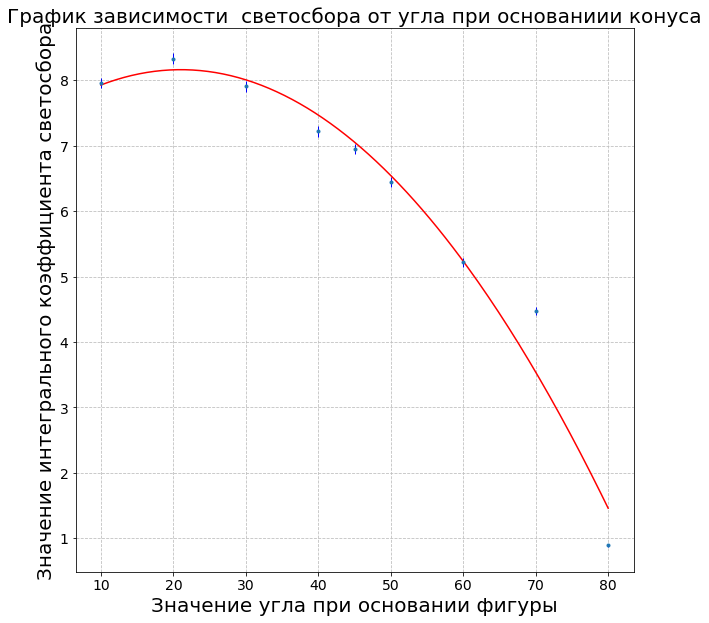

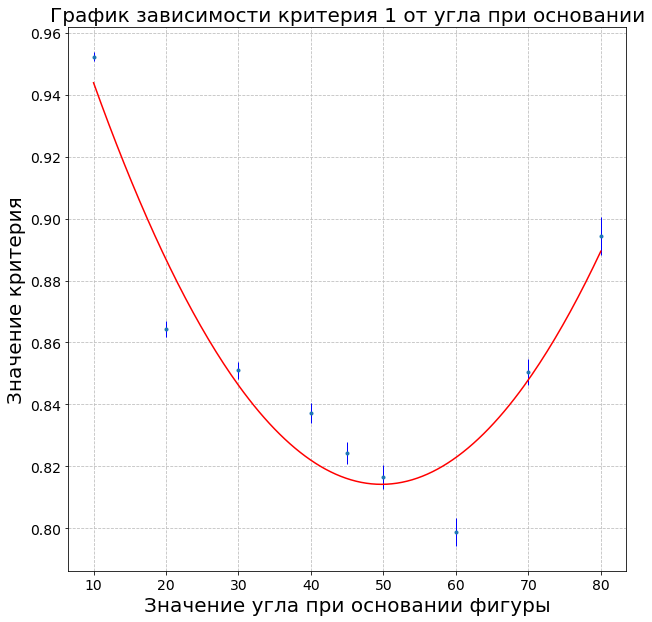

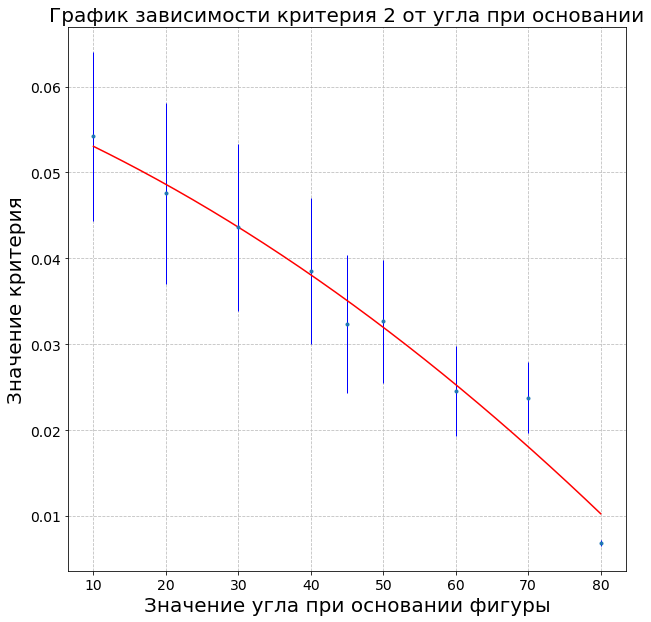

In [6]:
### Чтение данных. Запущено в каждой точке по 100000 фотонов
for i in range(9):           
    file_name=r"D:\figures\конус\deegres10\%d.txt"%(angle[i])
    file=open(file_name, 'r')
    print(file_name)
    for j in range (0,21,1):    
        line=file.readline()
        t=int(line)
        photon[j][i]=t
        
### Массив из значений ошибок для каждой точки бросания        
errph[:,:]=photon[:,:]**(1/2)

### Рассчет интегрального коэффициента светосбора с погрешностью для каждой фигуры
### Рассчет среднего числа собранных фотонов с погрешностью для каждой фигуры
light=np.array([ float(sum((r_max[:]**2-r_min[:]**2)*PI*photon[:,i]/1000)/(PI*r_max[20]**2) ) for i in range (9)])
lighterr=np.array([ float(sum((r_max[:]**2-r_min[:]**2)*PI*errph[:,i]/1000)/(PI*r_max[20]**2) ) for i in range (9)])
midpho=np.array([ float(light[i]*100) for i in range (9)])
midphoerr=np.array([ float(lighterr[i]*100) for i in range (9)])

### Рассчет знчения критерия 1 (ищется относительное значение разброса между максимально собранным числом фотонов
### и минимальным значением) c погрешностью
kr1=np.array([ float((photon[:,i].max()-photon[:,i].min())/photon[:,i].max()) for i in range (9)])
kr1err=np.array([float((1-kr1[i])*((errph[:,i].max()/photon[:,i].max())**2+(errph[:,i].min()/photon[:,i].min())**2)**(1/2)) for i in range (9)])

### Рассчет критерия 2 (оценка дисперсии для каждонго угла)  с погрешностью
kr2=np.array([ float((sum((light[i]/100-photon[:,i]/100000)**2*PI*(r_max[:]**2-r_min[:]**2))/(PI*r_max[20]**2))**(1/2)) for i in range (9)])
kr2err=np.array([float((sum(2*((light[i]/100-photon[:,i]/100000)**2*(lighterr[i]/100)**2 + (light[i]-photon[:,i]/100000)**2*(errph[:,i]/100000)**2)*PI*(r_max[:]**2-r_min[:]**2))/(PI*r_max[20]**2))**(1/2)) for i in range (9)])   
        
### Построение графиков зависимости зарегистрированных фотонов от расстояния до оси симметрии
plt.figure(figsize=(21, 21))
for i in range (9):
    #plt.figure(i, figsize=(10, 10))
    plt.subplot(3,3,i+1)
    plt.grid(True, linestyle='--', color='0.75')
    plt.xlabel('Расстояние от оси симметрии до точки броска, см', size = '14')
    plt.ylabel('Значение коэффициента светосбора, %', size = '14')
    plt.title('Конус,угол при основании %d градусов' %(angle[i]), size = '14')
    hk=photon[:,i]/1000
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    print('-------------------------------------------------------------------')
        
    ### Рассчет коэффициента детерминации - оценки качества приближения
    z=np.polyfit(distance,hk,2)
    determination(distance,hk,z)
    
    ### Вывод остального нужного   
    print('Функция аппроксимирующей кривой y=%fx^2+%fx+%f' %(z[0], z[1], z[2]))
    print('Иттегральный коэффициент светосбора %f +/- %f' %(light[i], lighterr[i]))
    print('Среднее число собранных фотонов %f +/- %f ' %(midpho[i], midphoerr[i]))
    print('Значение критерия 1 - %f  +/- %f ' %(kr1[i], kr1err[i]))
    print('Значение критерия 2 - %f  +/- %f ' %(kr2[i], kr2err[i]))
    print('-------------------------------------------------------------------')
    dis1=np.linspace(7,50,num=100)
    plt.plot(dis1, z[0]*(dis1)**2+ z[1]*(dis1)+z[2], 'r', label='Fitted line')
    plt.errorbar(distance, hk, yerr=errph[:,i]/1000,fmt='.', ecolor='b', linewidth=1, label='Dots with errors')
    
### Построение графика для интегрального коэффициента светосбора    
plt.figure(10, figsize=(10, 10))        
plt.subplot(1,1,1)
plt.grid(True, linestyle='--', color='0.75')
plt.title('График зависимости  светосбора от угла при основаниии конуса', size = '20')
plt.xlabel('Значение угла при основании фигуры', size = '20')
plt.ylabel('Значение интегрального коэффициента светосбора', size = '20')
z=np.polyfit(angle,light,2)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

###  Рассчет коэффициента детерминации - оценки качества приближения
print('-------------------------------------------------------------------')
print('Интегральный светосбор')
determination(angle,light,z)
print('-------------------------------------------------------------------')  

###    
dis2=np.linspace(10,80,num=200)
plt.plot(dis2, z[0]*(dis2)**2+ z[1]*(dis2)+z[2], 'r')
plt.errorbar(angle, light, yerr=lighterr,fmt='.', ecolor='b', linewidth=1)

### Построение графика для Критерия 1
plt.figure(11, figsize=(10, 10))        
plt.subplot(1,1,1)
plt.grid(True, linestyle='--', color='0.75')
plt.title('График зависимости критерия 1 от угла при основании', size = '20')
plt.xlabel('Значение угла при основании фигуры', size = '20')
plt.ylabel('Значение критерия', size = '20')
z1=np.polyfit(angle,kr1,2)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

###  Рассчет коэффициента детерминации - оценки качества приближения
print('-------------------------------------------------------------------')
print('Критерий первый')
determination(angle,kr1,z1)
print('-------------------------------------------------------------------')

###  
plt.plot(dis2, z1[0]*(dis2)**2+ z1[1]*(dis2)+z1[2], 'r')
plt.errorbar(angle, kr1, yerr=kr1err,fmt='.', ecolor='b', linewidth=1)

### Построение графика для Критерия 2
plt.figure(12, figsize=(10, 10))        
plt.subplot(1,1,1)
plt.grid(True, linestyle='--', color='0.75')
plt.title('График зависимости критерия 2 от угла при основании', size = '20')
plt.xlabel('Значение угла при основании фигуры', size = '20')
plt.ylabel('Значение критерия', size = '20')
z1=np.polyfit(angle,kr2,2)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

###  Рассчет коэффициента детерминации - оценки качества приближения
print('-------------------------------------------------------------------')
print('Критерий второй')
determination(angle,kr2,z1)
print('-------------------------------------------------------------------')

###  
plt.plot(dis2, z1[0]*(dis2)**2+ z1[1]*(dis2)+z1[2], 'r')
plt.errorbar(angle, kr2, yerr=kr2err,fmt='.', ecolor='b', linewidth=1)

## deegres11 -  в этой папке конусы от 10 до 80 градусов
## Отражение конуса - диффузное, основания - зеркальное
## Отражение основания - 0.85, отражение стенок - 0.99
## Запускалось по 100000

D:\figures\конус\deegres11\10.txt
D:\figures\конус\deegres11\20.txt
D:\figures\конус\deegres11\30.txt
D:\figures\конус\deegres11\40.txt
D:\figures\конус\deegres11\45.txt
D:\figures\конус\deegres11\50.txt
D:\figures\конус\deegres11\60.txt
D:\figures\конус\deegres11\70.txt
D:\figures\конус\deegres11\80.txt
-------------------------------------------------------------------
Качество приближения очень хорошее - 0.993571
Функция аппроксимирующей кривой y=0.007766x^2+-0.884593x+28.568597
Иттегральный коэффициент светосбора 11.429638 +/- 0.102256
Среднее число собранных фотонов 1142.963800 +/- 10.225640 
Значение критерия 1 - 0.849517  +/- 0.002826 
Значение критерия 2 - 0.048281  +/- 0.017004 
-------------------------------------------------------------------
-------------------------------------------------------------------
Качество приближения приемлимое - 0.210278
Функция аппроксимирующей кривой y=0.050334x^2+-2.827710x+45.836570
Иттегральный коэффициент светосбора 12.088169 +/- 0.10539

<ErrorbarContainer object of 3 artists>

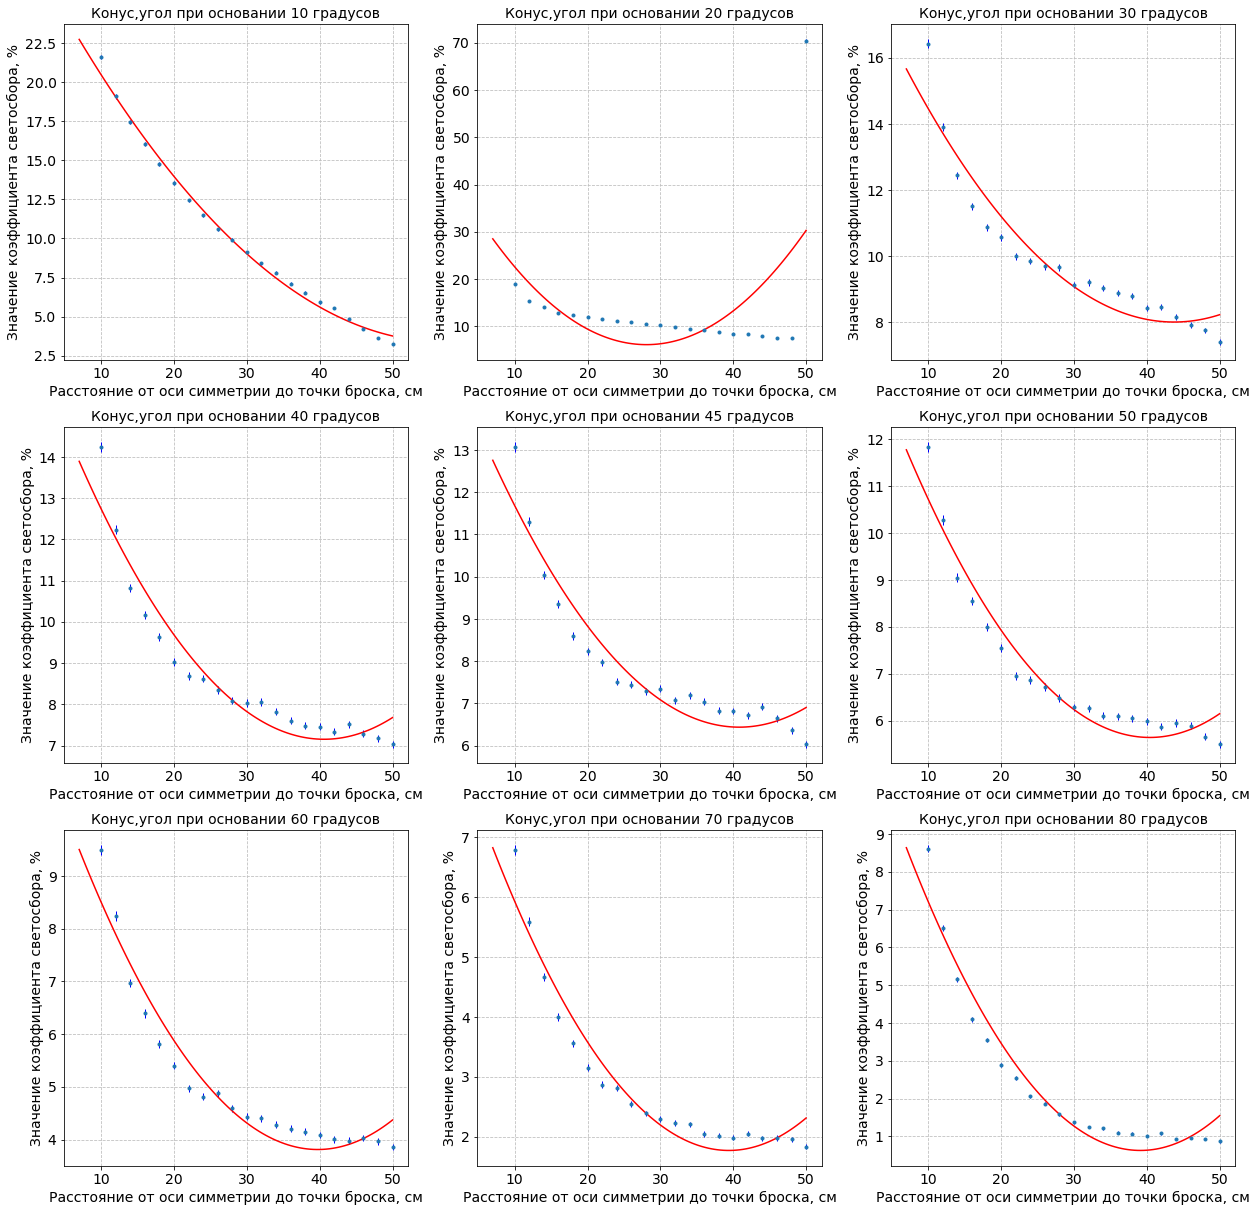

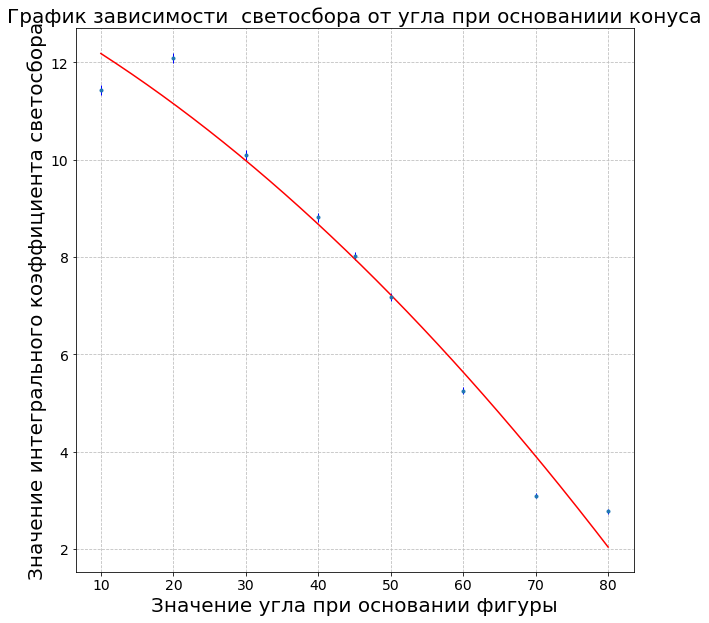

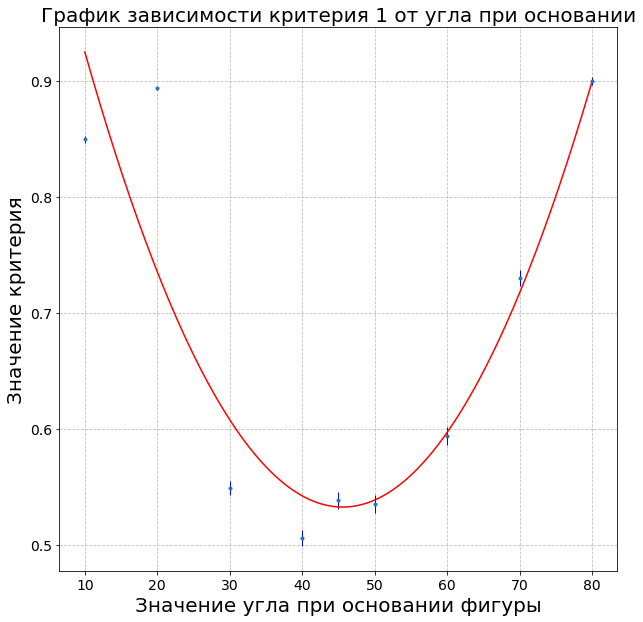

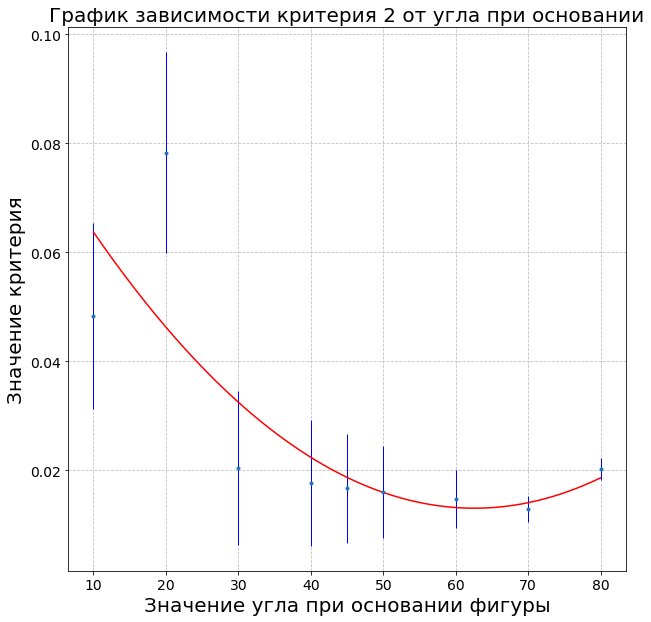

In [7]:
### Чтение данных. Запущено в каждой точке по 100000 фотонов
for i in range(9):           
    file_name=r"D:\figures\конус\deegres11\%d.txt"%(angle[i])
    file=open(file_name, 'r')
    print(file_name)
    for j in range (0,21,1):    
        line=file.readline()
        t=int(line)
        photon[j][i]=t
        
### Массив из значений ошибок для каждой точки бросания        
errph[:,:]=photon[:,:]**(1/2)

### Рассчет интегрального коэффициента светосбора с погрешностью для каждой фигуры
### Рассчет среднего числа собранных фотонов с погрешностью для каждой фигуры
light=np.array([ float(sum((r_max[:]**2-r_min[:]**2)*PI*photon[:,i]/1000)/(PI*r_max[20]**2) ) for i in range (9)])
lighterr=np.array([ float(sum((r_max[:]**2-r_min[:]**2)*PI*errph[:,i]/1000)/(PI*r_max[20]**2) ) for i in range (9)])
midpho=np.array([ float(light[i]*100) for i in range (9)])
midphoerr=np.array([ float(lighterr[i]*100) for i in range (9)])

### Рассчет знчения критерия 1 (ищется относительное значение разброса между максимально собранным числом фотонов
### и минимальным значением) c погрешностью
kr1=np.array([ float((photon[:,i].max()-photon[:,i].min())/photon[:,i].max()) for i in range (9)])
kr1err=np.array([float((1-kr1[i])*((errph[:,i].max()/photon[:,i].max())**2+(errph[:,i].min()/photon[:,i].min())**2)**(1/2)) for i in range (9)])

### Рассчет критерия 2 (оценка дисперсии для каждонго угла)  с погрешностью
kr2=np.array([ float((sum((light[i]/100-photon[:,i]/100000)**2*PI*(r_max[:]**2-r_min[:]**2))/(PI*r_max[20]**2))**(1/2)) for i in range (9)])
kr2err=np.array([float((sum(2*((light[i]/100-photon[:,i]/100000)**2*(lighterr[i]/100)**2 + (light[i]-photon[:,i]/100000)**2*(errph[:,i]/100000)**2)*PI*(r_max[:]**2-r_min[:]**2))/(PI*r_max[20]**2))**(1/2)) for i in range (9)])   
        
### Построение графиков зависимости зарегистрированных фотонов от расстояния до оси симметрии
plt.figure(figsize=(21, 21))
for i in range (9):
    #plt.figure(i, figsize=(10, 10))
    plt.subplot(3,3,i+1)
    plt.grid(True, linestyle='--', color='0.75')
    plt.xlabel('Расстояние от оси симметрии до точки броска, см', size = '14')
    plt.ylabel('Значение коэффициента светосбора, %', size = '14')
    plt.title('Конус,угол при основании %d градусов' %(angle[i]), size = '14')
    hk=photon[:,i]/1000
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    print('-------------------------------------------------------------------')
        
    ### Рассчет коэффициента детерминации - оценки качества приближения
    z=np.polyfit(distance,hk,2)
    determination(distance,hk,z)
    
    ### Вывод остального нужного   
    print('Функция аппроксимирующей кривой y=%fx^2+%fx+%f' %(z[0], z[1], z[2]))
    print('Иттегральный коэффициент светосбора %f +/- %f' %(light[i], lighterr[i]))
    print('Среднее число собранных фотонов %f +/- %f ' %(midpho[i], midphoerr[i]))
    print('Значение критерия 1 - %f  +/- %f ' %(kr1[i], kr1err[i]))
    print('Значение критерия 2 - %f  +/- %f ' %(kr2[i], kr2err[i]))
    print('-------------------------------------------------------------------')
    dis1=np.linspace(7,50,num=100)
    plt.plot(dis1, z[0]*(dis1)**2+ z[1]*(dis1)+z[2], 'r', label='Fitted line')
    plt.errorbar(distance, hk, yerr=errph[:,i]/1000,fmt='.', ecolor='b', linewidth=1, label='Dots with errors')
    
### Построение графика для интегрального коэффициента светосбора    
plt.figure(10, figsize=(10, 10))        
plt.subplot(1,1,1)
plt.grid(True, linestyle='--', color='0.75')
plt.title('График зависимости  светосбора от угла при основаниии конуса', size = '20')
plt.xlabel('Значение угла при основании фигуры', size = '20')
plt.ylabel('Значение интегрального коэффициента светосбора', size = '20')
z=np.polyfit(angle,light,2)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

###  Рассчет коэффициента детерминации - оценки качества приближения
print('-------------------------------------------------------------------')
print('Интегральный светосбор')
determination(angle,light,z)
print('-------------------------------------------------------------------')  

###    
dis2=np.linspace(10,80,num=200)
plt.plot(dis2, z[0]*(dis2)**2+ z[1]*(dis2)+z[2], 'r')
plt.errorbar(angle, light, yerr=lighterr,fmt='.', ecolor='b', linewidth=1)

### Построение графика для Критерия 1
plt.figure(11, figsize=(10, 10))        
plt.subplot(1,1,1)
plt.grid(True, linestyle='--', color='0.75')
plt.title('График зависимости критерия 1 от угла при основании', size = '20')
plt.xlabel('Значение угла при основании фигуры', size = '20')
plt.ylabel('Значение критерия', size = '20')
z1=np.polyfit(angle,kr1,2)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

###  Рассчет коэффициента детерминации - оценки качества приближения
print('-------------------------------------------------------------------')
print('Критерий первый')
determination(angle,kr1,z1)
print('-------------------------------------------------------------------')

###  
plt.plot(dis2, z1[0]*(dis2)**2+ z1[1]*(dis2)+z1[2], 'r')
plt.errorbar(angle, kr1, yerr=kr1err,fmt='.', ecolor='b', linewidth=1)

### Построение графика для Критерия 2
plt.figure(12, figsize=(10, 10))        
plt.subplot(1,1,1)
plt.grid(True, linestyle='--', color='0.75')
plt.title('График зависимости критерия 2 от угла при основании', size = '20')
plt.xlabel('Значение угла при основании фигуры', size = '20')
plt.ylabel('Значение критерия', size = '20')
z1=np.polyfit(angle,kr2,2)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

###  Рассчет коэффициента детерминации - оценки качества приближения
print('-------------------------------------------------------------------')
print('Критерий второй')
determination(angle,kr2,z1)
print('-------------------------------------------------------------------')

###  
plt.plot(dis2, z1[0]*(dis2)**2+ z1[1]*(dis2)+z1[2], 'r')
plt.errorbar(angle, kr2, yerr=kr2err,fmt='.', ecolor='b', linewidth=1)